# El modelo de Bosques Aleatorios (Random Forest)
se está utilizando en este contexto para predecir el Índice de Masa Corporal (IMC) porque puede ser útil en escenarios donde se desee comprender cómo ciertas características y hábitos de una persona influyen en su IMC. Aunque el IMC puede calcularse fácilmente a partir de la altura y el peso, el objetivo aquí no es simplemente replicar este cálculo, sino más bien explorar la relación entre una variedad de factores (como la edad, el nivel de actividad física, los hábitos alimenticios, el historial médico, etc.) y el IMC.

El modelo de Bosques Aleatorios es una opción adecuada porque:

    Modelo no lineal: Los Bosques Aleatorios pueden capturar relaciones no lineales entre las características de entrada y la variable objetivo (en este caso, el IMC). Esto es importante porque la relación entre los factores de estilo de vida y el IMC podría no ser lineal.

    Manejo de características complejas: Este modelo puede manejar conjuntos de datos con una gran cantidad de características (variables) y manejar características categóricas de manera eficiente, como el historial médico, los hábitos alimenticios y la sensibilidad a ciertos alimentos.

    Interpretación de características importantes: Los Bosques Aleatorios proporcionan una medida de la importancia de cada característica en la predicción del resultado. Esto puede ayudar a identificar qué factores tienen el mayor impacto en el IMC de una persona.

En resumen, aunque el IMC es una medida simple que se puede calcular fácilmente, el uso de un modelo como Bosques Aleatorios puede ayudar a comprender mejor cómo diversos factores influyen en el IMC de una persona y, por lo tanto, puede ser útil en el análisis de la salud y el estilo de vida.

---
---
---

En términos sencillos, estamos utilizando un modelo de Bosques Aleatorios, que es como una "multitud" de árboles de decisión que trabajan juntos para hacer predicciones. Cada árbol de decisión se entrena con datos de personas que tienen información sobre su salud, como edad, peso, altura, hábitos alimenticios, etc.

Ahora bien, podrías preguntarte, ¿por qué estamos intentando predecir el IMC si podemos calcularlo fácilmente con peso y altura? Bueno, aquí está la clave: no estamos buscando simplemente calcular el IMC, sino entender cómo diferentes factores influyen en él.

El IMC es una medida importante de la salud, pero su valor por sí solo no nos dice toda la historia. Queremos ver cómo las diferentes características de una persona, como su edad, nivel de actividad física, y demás, se relacionan con su IMC. Es como tratar de entender qué ingredientes hacen que una receta sea deliciosa.

El modelo de Bosques Aleatorios nos ayuda a ver estas relaciones de una manera más completa. Nos da una idea de qué factores son más importantes para determinar el IMC y cómo interactúan estos factores entre sí. En resumen, nos ayuda a entender mejor qué cosas están relacionadas con una mejor salud.

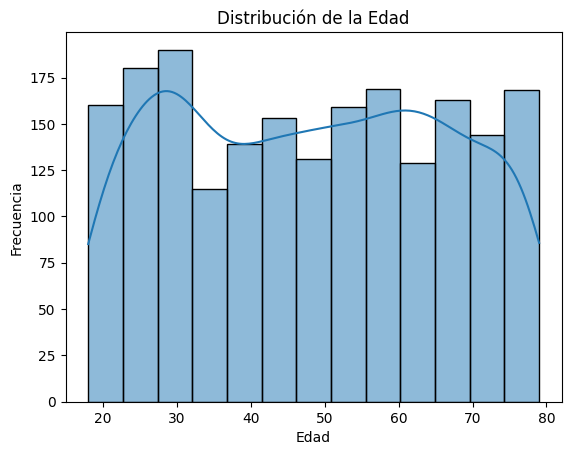

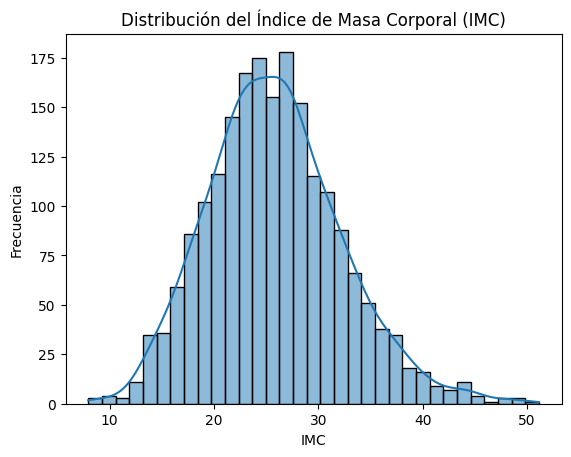

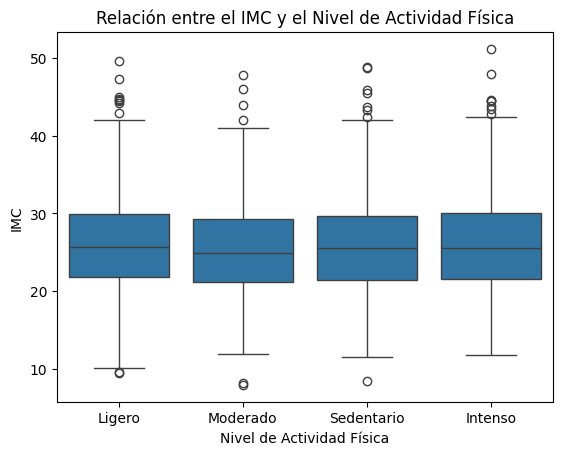

In [9]:
# -*- coding: utf-8 -*-
"""
Ejercicio_Nutriologos
"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Establecer la cantidad de datos a generar
cantidad_datos = 2000

# Definir funciones para generar datos simulados
def generar_edad():
    return np.random.randint(18, 80, cantidad_datos)

def generar_peso(edad):
    # Para simular casos de obesidad en ciertas edades
    sobrepeso = np.random.choice([0, 1], cantidad_datos, p=[0.9, 0.1])  # 10% de casos de obesidad
    peso_base = np.random.normal(70, 15, cantidad_datos)  # Distribución normal con media de 70 kg y desviación estándar de 15 kg
    peso = peso_base + sobrepeso * 20  # Añadir 20 kg en caso de obesidad
    # Ajustar el peso basado en la edad
    peso = np.where((edad >= 40) & (edad <= 60), peso + 5, peso)  # Añadir 5 kg para edades entre 40 y 60
    return peso

def generar_altura():
    # Distribución normal con media de 170 cm y desviación estándar de 10 cm
    return np.random.normal(170, 10, cantidad_datos)

def calcular_imc(peso, altura):
    # Fórmula del Índice de Masa Corporal (IMC): peso (kg) / altura (m)^2
    return peso / ((altura/100) ** 2)

def generar_circunferencia_cintura():
    # Distribución normal con media de 90 cm y desviación estándar de 10 cm
    return np.random.normal(90, 10, cantidad_datos)

def generar_circunferencia_cadera():
    # Distribución normal con media de 100 cm y desviación estándar de 10 cm
    return np.random.normal(100, 10, cantidad_datos)

def generar_porcentaje_grasa_corporal():
    # Distribución normal con media de 25% y desviación estándar de 5%
    return np.random.normal(25, 5, cantidad_datos)

def generar_historial_medico_familiar():
    # Simulación de historial médico familiar
    enfermedades = ['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares']
    return [', '.join(np.random.choice(enfermedades, np.random.randint(0, len(enfermedades)), replace=False)) for _ in range(cantidad_datos)]

def generar_nivel_actividad_fisica():
    return np.random.choice(['Sedentario', 'Ligero', 'Moderado', 'Intenso'], cantidad_datos)

def generar_habitos_alimenticios():
    habitos = ['Vegetariano', 'Omnívoro', 'Vegano', 'Pescetariano', 'Keto', 'Paleo']
    return np.random.choice(habitos, cantidad_datos)

def generar_horas_sueño_noche():
    # Distribución normal con media de 7 horas y desviación estándar de 1 hora
    return np.random.normal(7, 1, cantidad_datos)

def generar_nivel_estres_percibido():
    return np.random.randint(1, 11, cantidad_datos)

def generar_consumo_agua_diario():
    # Distribución normal con media de 2 litros y desviación estándar de 0.5 litros
    return np.random.normal(2, 0.5, cantidad_datos)

def generar_consumo_alcohol():
    # Distribución normal con media de 5 unidades por semana y desviación estándar de 3 unidades por semana
    return np.random.normal(5, 3, cantidad_datos)

def generar_consumo_tabaco():
    # Distribución normal con media de 5 cigarrillos por día y desviación estándar de 2 cigarrillos por día
    return np.random.normal(5, 2, cantidad_datos)

def generar_consumo_cafeina():
    # Distribución normal con media de 200 mg por día y desviación estándar de 100 mg por día
    return np.random.normal(200, 100, cantidad_datos)

def generar_enfermedades_cronicas():
    enfermedades = ['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']
    return [', '.join(np.random.choice(enfermedades, np.random.randint(0, len(enfermedades)), replace=False)) for _ in range(cantidad_datos)]

def generar_medicamentos_actuales():
    medicamentos = ['Aspirina', 'Insulina', 'Losartán', 'Atorvastatina', 'Metformina', 'Omeprazol', 'Salbutamol']
    dosis = ['10 mg', '50 mg', '100 mg', '20 mg', '200 UI', '500 mg', '1 tableta']
    return ['{}, {}'.format(np.random.choice(medicamentos), np.random.choice(dosis)) for _ in range(cantidad_datos)]

def generar_metas_perdida_peso():
    # Distribución normal con media de 5 kg y desviación estándar de 3 kg
    return np.random.normal(5, 3, cantidad_datos)

def generar_frecuencia_cardiaca_reposo():
    # Distribución normal con media de 70 latidos por minuto y desviación estándar de 10 latidos por minuto
    return np.random.normal(70, 10, cantidad_datos)

def generar_presion_arterial_sistolica():
    # Distribución normal con media de 120 mmHg y desviación estándar de 10 mmHg
    return np.random.normal(120, 10, cantidad_datos)

def generar_presion_arterial_diastolica():
    # Distribución normal con media de 80 mmHg y desviación estándar de 8 mmHg
    return np.random.normal(80, 8, cantidad_datos)

def generar_niveles_colesterol():
    ldl = np.random.normal(100, 20, cantidad_datos)  # LDL: media de 100 mg/dL, desviación estándar de 20 mg/dL
    hdl = np.random.normal(50, 10, cantidad_datos)  # HDL: media de 50 mg/dL, desviación estándar de 10 mg/dL
    trigliceridos = np.random.normal(150, 30, cantidad_datos)  # Triglicéridos: media de 150 mg/dL, desviación estándar de 30 mg/dL
    return ldl, hdl, trigliceridos

def generar_niveles_glucosa_sangre():
    ayunas = np.random.normal(90, 10, cantidad_datos)  # Niveles de glucosa en ayunas: media de 90 mg/dL, desviación estándar de 10 mg/dL
    postprandial = np.random.normal(120, 20, cantidad_datos)  # Niveles de glucosa postprandial: media de 120 mg/dL, desviación estándar de 20 mg/dL
    return ayunas, postprandial

def generar_sensibilidad_alimentos():
    alimentos = ['Lactosa', 'Gluten', 'Nueces', 'Mariscos', 'Huevo', 'Soja']
    return [', '.join(np.random.choice(alimentos, np.random.randint(0, len(alimentos)), replace=False)) for _ in range(cantidad_datos)]

def generar_nivel_satisfaccion_dieta_actual():
    return np.random.randint(1, 11, cantidad_datos)

def generar_cumplimiento_plan_nutricional():
    return np.random.randint(1, 11, cantidad_datos)

def generar_actividades_fisicas_realizadas():
    actividades = ['Caminar', 'Correr', 'Nadar', 'Bailar', 'Levantamiento de pesas', 'Yoga']
    return [', '.join(np.random.choice(actividades, np.random.randint(1, 4), replace=False)) for _ in range(cantidad_datos)]

def generar_consumo_frutas_verduras():
    # Distribución normal con media de 5 porciones por día y desviación estándar de 2 porciones por día
    return np.random.normal(5, 2, cantidad_datos)

def generar_nivel_conocimiento_nutricion():
    return np.random.choice(['Bajo', 'Medio', 'Alto'], cantidad_datos)

# Generar datos simulados
edad = generar_edad()
peso = generar_peso(edad)
altura = generar_altura()
circunferencia_cintura = generar_circunferencia_cintura()
circunferencia_cadera = generar_circunferencia_cadera()
porcentaje_grasa_corporal = generar_porcentaje_grasa_corporal()
historial_medico_familiar = generar_historial_medico_familiar()
nivel_actividad_fisica = generar_nivel_actividad_fisica()
habitos_alimenticios = generar_habitos_alimenticios()
horas_sueño_noche = generar_horas_sueño_noche()
nivel_estres_percibido = generar_nivel_estres_percibido()
consumo_agua_diario = generar_consumo_agua_diario()
consumo_alcohol = generar_consumo_alcohol()
consumo_tabaco = generar_consumo_tabaco()
consumo_cafeina = generar_consumo_cafeina()
enfermedades_cronicas = generar_enfermedades_cronicas()
medicamentos_actuales = generar_medicamentos_actuales()
metas_perdida_peso = generar_metas_perdida_peso()
frecuencia_cardiaca_reposo = generar_frecuencia_cardiaca_reposo()
presion_arterial_sistolica = generar_presion_arterial_sistolica()
presion_arterial_diastolica = generar_presion_arterial_diastolica()
ldl, hdl, trigliceridos = generar_niveles_colesterol()
ayunas, postprandial = generar_niveles_glucosa_sangre()
sensibilidad_alimentos = generar_sensibilidad_alimentos()
nivel_satisfaccion_dieta_actual = generar_nivel_satisfaccion_dieta_actual()
cumplimiento_plan_nutricional = generar_cumplimiento_plan_nutricional()
actividades_fisicas_realizadas = generar_actividades_fisicas_realizadas()
consumo_frutas_verduras = generar_consumo_frutas_verduras()
nivel_conocimiento_nutricion = generar_nivel_conocimiento_nutricion()

# Crear un diccionario con los datos generados
data = {
    'Edad': edad,
    'Peso': peso,
    'Altura': altura,
    'IMC': calcular_imc(peso, altura),
    'Circunferencia de cintura': circunferencia_cintura,
    'Circunferencia de cadera': circunferencia_cadera,
    'Porcentaje de grasa corporal': porcentaje_grasa_corporal,
    'Historial médico familiar': historial_medico_familiar,
    'Nivel de actividad física': nivel_actividad_fisica,
    'Hábitos alimenticios': habitos_alimenticios,
    'Horas de sueño por noche': horas_sueño_noche,
    'Nivel de estrés percibido': nivel_estres_percibido,
    'Consumo de agua diario': consumo_agua_diario,
    'Consumo de alcohol': consumo_alcohol,
    'Consumo de tabaco': consumo_tabaco,
    'Consumo de cafeína': consumo_cafeina,
    'Enfermedades crónicas': enfermedades_cronicas,
    'Medicamentos actuales': medicamentos_actuales,
    'Metas de pérdida de peso': metas_perdida_peso,
    'Frecuencia cardíaca en reposo': frecuencia_cardiaca_reposo,
    'Presión arterial sistólica': presion_arterial_sistolica,
    'Presión arterial diastólica': presion_arterial_diastolica,
    'Niveles de colesterol (LDL)': ldl,
    'Niveles de colesterol (HDL)': hdl,
    'Niveles de colesterol (Triglicéridos)': trigliceridos,
    'Niveles de glucosa en sangre (Ayunas)': ayunas,
    'Niveles de glucosa en sangre (Postprandial)': postprandial,
    'Sensibilidad a ciertos alimentos': sensibilidad_alimentos,
    'Nivel de satisfacción con la dieta actual': nivel_satisfaccion_dieta_actual,
    'Cumplimiento con el plan nutricional': cumplimiento_plan_nutricional,
    'Actividades físicas realizadas': actividades_fisicas_realizadas,
    'Consumo de frutas y verduras': consumo_frutas_verduras,
    'Nivel de conocimiento sobre nutrición': nivel_conocimiento_nutricion
}

# Crear un DataFrame de Pandas
df = pd.DataFrame(data)

# Verificar y corregir el tipo de datos de las columnas
df['Historial médico familiar'] = df['Historial médico familiar'].astype(str)
df['Enfermedades crónicas'] = df['Enfermedades crónicas'].astype(str)
df['Medicamentos actuales'] = df['Medicamentos actuales'].astype(str)
df['Actividades físicas realizadas'] = df['Actividades físicas realizadas'].astype(str)
df['Sensibilidad a ciertos alimentos'] = df['Sensibilidad a ciertos alimentos'].astype(str)

# Guardar el DataFrame en un archivo CSV
df.to_csv('datos_pacientes.csv', index=False)

# Visualizar los primeros registros del DataFrame
df.head()

# Analizar la distribución de los datos
df.describe()

# Visualizar la distribución de la edad
sns.histplot(df['Edad'], kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución del IMC
sns.histplot(df['IMC'], kde=True)
plt.title('Distribución del Índice de Masa Corporal (IMC)')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la relación entre el IMC y el nivel de actividad física
sns.boxplot(x='Nivel de actividad física', y='IMC', data=df)
plt.title('Relación entre el IMC y el Nivel de Actividad Física')
plt.xlabel('Nivel de Actividad Física')
plt.ylabel('IMC')
plt.show()


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Dividir los datos en conjunto de características (X) y variable objetivo (y)
X = df.drop(['IMC'], axis=1)
y = df['IMC']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Manejar los datos faltantes ('')
X_train.replace('', np.nan, inplace=True)
X_test.replace('', np.nan, inplace=True)

# Definir las columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Codificar las variables categóricas
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Ajustar y transformar las columnas categóricas de entrenamiento
X_train_encoded = encoder.fit_transform(X_train[categorical_features])

# Transformar las columnas categóricas de prueba
X_test_encoded = encoder.transform(X_test[categorical_features])

# Imputar valores faltantes en las columnas numéricas
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train[numeric_features])
X_test_imputed = imputer.transform(X_test[numeric_features])

# Concatenar las columnas numéricas y las codificadas
X_train_final = np.hstack((X_train_imputed, X_train_encoded))
X_test_final = np.hstack((X_test_imputed, X_test_encoded))

# Entrenar el modelo de Bosques Aleatorios con los datos finales
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_final, y_train)

# Evaluar el modelo
y_pred_train = rf_model.predict(X_train_final)
y_pred_test = rf_model.predict(X_test_final)

# Calcular el error cuadrático medio y el coeficiente de determinación (R^2)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Error cuadrático medio (Entrenamiento):", train_mse)
print("Error cuadrático medio (Prueba):", test_mse)
print("Coeficiente de determinación (R^2):", r2)

# Obtener la importancia de las características
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Mostrar las 5 características más importantes
print("\nLas 5 características más importantes:")
for i in range(5):
    print(f"{i+1}. {X.columns[indices[i]]}: {feature_importances[indices[i]]}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Error cuadrático medio (Entrenamiento): 0.05652749506660792
Error cuadrático medio (Prueba): 0.36891790762001875
Coeficiente de determinación (R^2): 0.9911803908969217

Las 5 características más importantes:
1. Peso: 0.7900672609640494
2. Altura: 0.19954447278091114
3. Historial médico familiar: 0.0014007001027878136
4. Frecuencia cardíaca en reposo: 0.0005747854731681713
5. Medicamentos actuales: 0.0005052500113736274


## Importar las bibliotecas necesarias

   * Se importan las bibliotecas requeridas para el análisis de datos y el modelado, como RandomForestRegressor para el modelo de Bosques Aleatorios, train_test_split para dividir los datos en conjuntos de entrenamiento y prueba, mean_squared_error y r2_score para evaluar el rendimiento del modelo, OneHotEncoder para codificar las variables categóricas y SimpleImputer para manejar los valores faltantes.

## División de los datos

   * Los datos se dividen en características (X) y variable objetivo (y) para entrenar el modelo.

## Manejo de datos faltantes

   * Se reemplazan los valores faltantes en los conjuntos de entrenamiento y prueba con NaN (valores nulos).

## Definición de columnas numéricas y categóricas

   * Se identifican las columnas numéricas y categóricas en el conjunto de características.

## Codificación de variables categóricas

   * Las variables categóricas se codifican utilizando OneHotEncoder para convertirlas en variables numéricas binarias.

## Imputación de valores faltantes

   * Se imputan los valores faltantes en las columnas numéricas utilizando la mediana de cada columna.

## Concatenación de características

   * Se combinan las columnas numéricas imputadas con las columnas codificadas para crear conjuntos de datos finales tanto para entrenamiento como para prueba.

## Entrenamiento del modelo de Bosques Aleatorios

   * Se entrena el modelo de Bosques Aleatorios utilizando los conjuntos de datos finales.

## Evaluación del modelo

   * Se utilizan los conjuntos de datos de entrenamiento y prueba para predecir los valores de IMC y se evalúa el rendimiento del modelo utilizando el error cuadrático medio (MSE) y el coeficiente de determinación (R^2).

## Importancia de características

   * Se obtiene la importancia de las características del modelo entrenado para identificar las características más influyentes en la predicción del IMC.

In [ ]:
from sklearn.model_selection import learning_curve

# Definir una función para trazar las curvas de aprendizaje
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Trazar las curvas de aprendizaje
plot_learning_curve(rf_model, "Curvas de Aprendizaje", X_train_final, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

# Mostrar el gráfico
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np
import joblib

# Dividir los datos en conjunto de características (X) y variable objetivo (y)
X = df.drop(['IMC'], axis=1)
y = df['IMC']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Manejar los datos faltantes ('')
X_train.replace('', np.nan, inplace=True)
X_test.replace('', np.nan, inplace=True)

# Definir las columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Codificar las variables categóricas
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Ajustar y transformar las columnas categóricas de entrenamiento
X_train_encoded = encoder.fit_transform(X_train[categorical_features])

# Transformar las columnas categóricas de prueba
X_test_encoded = encoder.transform(X_test[categorical_features])

# Imputar valores faltantes en las columnas numéricas
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train[numeric_features])
X_test_imputed = imputer.transform(X_test[numeric_features])

# Concatenar las columnas numéricas y las codificadas
X_train_final = np.hstack((X_train_imputed, X_train_encoded))
X_test_final = np.hstack((X_test_imputed, X_test_encoded))

# Obtener las 5 características más importantes
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1][:5]

# Seleccionar solo las 5 características más importantes
X_train_final_selected = X_train_final[:, indices]
X_test_final_selected = X_test_final[:, indices]

# Entrenar el modelo de Bosques Aleatorios con las 5 características más importantes
rf_model_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_final_selected, y_train)

# Guardar el modelo entrenado
joblib.dump(rf_model_selected, 'random_forest_model_selected.pkl')

# Imprimir los resultados
print("Modelo entrenado y guardado con las 5 características más importantes.")


In [ ]:
# Importar Streamlit y otros módulos necesarios
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Cargar el modelo entrenado con las 5 características más importantes
rf_model_selected = joblib.load('random_forest_model_selected.pkl')

# Definir la aplicación Streamlit
def main():
    st.title('Aplicación de Predicción de Índice de Masa Corporal (IMC)')

    # Sidebar para la entrada de datos del usuario
    st.sidebar.header('Ingrese los datos del paciente:')

    # Recoger los datos del usuario
    edad = st.sidebar.number_input('Edad', min_value=18, max_value=100, step=1)
    peso = st.sidebar.number_input('Peso (kg)', min_value=30.0, max_value=300.0, step=0.1)
    altura = st.sidebar.number_input('Altura (cm)', min_value=100.0, max_value=250.0, step=0.1)
    nivel_actividad_fisica = st.sidebar.selectbox('Nivel de actividad física', ['Sedentario', 'Ligero', 'Moderado', 'Intenso'])
    consumo_alcohol = st.sidebar.selectbox('Consumo de alcohol', ['Bajo', 'Moderado', 'Alto'])

    # Predecir el IMC si se ingresan todos los datos
    if st.sidebar.button('Predecir IMC'):
        # Verificar si se han ingresado todos los datos necesarios
        if edad is not None and peso is not None and altura is not None and nivel_actividad_fisica is not None and consumo_alcohol is not None:
            # Convertir el nivel de actividad física en una codificación one-hot
            actividad_fisica_encoded = np.zeros(4)
            actividad_fisica_encoded[['Sedentario', 'Ligero', 'Moderado', 'Intenso'].index(nivel_actividad_fisica)] = 1

            # Convertir el consumo de alcohol en una codificación one-hot
            consumo_alcohol_encoded = np.zeros(3)
            consumo_alcohol_encoded[['Bajo', 'Moderado', 'Alto'].index(consumo_alcohol)] = 1

            # Preparar los datos para la predicción
            input_data = pd.DataFrame({
                'Edad': [edad],
                'Peso': [peso],
                'Altura': [altura],
                'Nivel_Actividad_Fisica_Sedentario': [actividad_fisica_encoded[0]],
                'Nivel_Actividad_Fisica_Ligero': [actividad_fisica_encoded[1]],
                'Nivel_Actividad_Fisica_Moderado': [actividad_fisica_encoded[2]],
                'Nivel_Actividad_Fisica_Intenso': [actividad_fisica_encoded[3]],
                'Consumo_Alcohol_Bajo': [consumo_alcohol_encoded[0]],
                'Consumo_Alcohol_Moderado': [consumo_alcohol_encoded[1]],
                'Consumo_Alcohol_Alto': [consumo_alcohol_encoded[2]]
            })

            # Realizar la predicción
            imc_pred = rf_model_selected.predict(input_data)

            # Mostrar el resultado de la predicción
            st.sidebar.success(f'El IMC predicho es: {imc_pred[0]:.2f}')
        else:
            # Mostrar un mensaje de error si no se han ingresado todos los datos necesarios
            st.sidebar.error('Por favor, complete todos los campos.')

# Ejecutar la aplicación
if __name__ == '__main__':
    main()
